See [metric_learning.ipynb](metric_learning.ipynb) for how the neighbors are generated.

In [1]:
import pickle

import numpy as np

with open('/data/patch_features_small/test2014_positive.p', 'rb') as f:
    eval_data = pickle.load(f)
    categories = eval_data['categories']
    labels = np.array([label.data.numpy() for label in eval_data['labels']])
    
with open('/data/patch_features_small/test2014_neighbors.p', 'rb') as f:
    neighbor_distances, neighbor_indices = pickle.load(f)

with open('/data/patch_features_small/train2014_embeddings.p', 'rb') as f:
    embeddings_dict = pickle.load(f)
    neighbor_labels = embeddings_dict['labels']
    
eval_data_index = np.sum(labels, axis=1) == 1
labels = np.array([np.argwhere(label).reshape(-1) for label in labels[eval_data_index]])
neighbor_distances = neighbor_distances[eval_data_index]
neighbor_indices = neighbor_indices[eval_data_index]

In [2]:
K = 64 # Max neighbors
categories

[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},
 {'supercategory': 'animal', 'id': 19, 'name': 'horse'},
 {'supercategory': 'animal', 'id': 20, 'name': 'sheep'},
 {'supercategory': 'animal', 'id': 21, 'name': 'cow'},
 {'supercategory': 'animal', 'id': 22, 'name': 'elephant'},
 {'supercategory': 'animal', 'id': 23, 'name': 'bear'},
 {'supercategory': 'animal', 'id': 24, 'name': 'zebra'},
 {'supercategory': 'animal', 'i

In [3]:
def compute_average_precision_score(k: int, category_index: int = -1) -> float:
    in_class_pct = np.array([
        np.sum(neighbor_labels[neighbor_indices[i, :k]], axis=0)[label]
        for i, label in enumerate(labels)
    ])
    if category_index > -1:
        in_class_pct = in_class_pct[labels == category_index]
    return np.mean(in_class_pct/k)

In [4]:
import pandas as pd
average_precision_by_k = pd.DataFrame({
    'k': list(range(1, K+1)),
    'average_precision_score': [compute_average_precision_score(k) for k in range(1, K + 1)]
})
average_precision_by_k

,average_precision_score,k
0,0.240092,1
1,0.238967,2
2,0.236795,3
3,0.235736,4
4,0.233916,5
5,0.232962,6
6,0.231564,7
7,0.230264,8
8,0.228938,9
9,0.227793,10


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_average_precision_score(ax, data):
    ax.plot(data['k'], data['average_precision_score'], c=plt.cm.Set1(1))
    ax.set_xlabel('K')
    ax.set_ylabel('In-class Percentage')
    ax.grid(True)

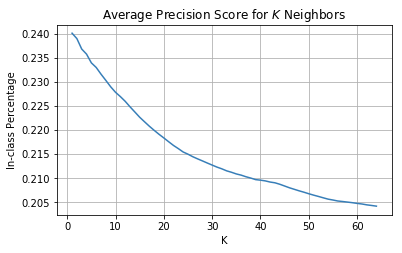

In [6]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, average_precision_by_k)
ax.set_title('Average Precision Score for $K$ Neighbors')
fig.savefig('metric_average_precision_score.pdf', bbox_inches='tight')

In [9]:
from collections import OrderedDict

average_precision_by_class = pd.DataFrame(OrderedDict([
    ('Label', [c['name'] for c in categories]),
    ('K = 1', [compute_average_precision_score(1, i) for i in range(len(categories))]),
    ('K = 3', [compute_average_precision_score(3, i) for i in range(len(categories))]),
    ('K = 5', [compute_average_precision_score(5, i) for i in range(len(categories))]),
    ('K = 10', [compute_average_precision_score(10, i) for i in range(len(categories))]),
    ('K = 15', [compute_average_precision_score(15, i) for i in range(len(categories))]),
]))
average_precision_by_class

,Label,K = 1,K = 3,K = 5,K = 10,K = 15
0,bicycle,0.042793,0.046547,0.044257,0.043187,0.043919
1,car,0.314220,0.309779,0.307115,0.291930,0.287312
2,motorcycle,0.051215,0.049844,0.049047,0.046280,0.045134
3,airplane,0.061684,0.063662,0.062554,0.058600,0.058521
4,bus,0.106321,0.100110,0.094995,0.095543,0.091804
5,train,0.044499,0.040379,0.037824,0.034981,0.037165
6,truck,0.147673,0.134968,0.126489,0.121318,0.120335
7,boat,0.098957,0.088207,0.083908,0.075624,0.075603
8,bird,0.208440,0.216303,0.214121,0.208521,0.197925
9,cat,0.287394,0.301850,0.301360,0.302536,0.289599


In [10]:
average_precision_by_class_latex = average_precision_by_class.copy()
average_precision_by_class_latex.columns = pd.MultiIndex.from_tuples(
    [('', 'Label')] + [
        ('Number of Neighbors', c)
        for c in list(average_precision_by_class_latex.columns[1:])
    ])
with open('metric_average_precision_by_class.tex', 'w') as f:
    f.write(average_precision_by_class_latex.to_latex(index=False))